In [12]:
from __future__ import print_function

%load_ext autoreload
%autoreload 2

import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd

sns.set(style='white', context='paper', rc={'font.sans-serif':'Arial', 'pdf.fonttype': 42})

%matplotlib inline


import flotilla
flotilla_dir = '/projects/ps-yeolab/obotvinnik/flotilla_projects'

study = flotilla.embark('singlecell_pnm_figure2_modalities_bayesian_kmers', flotilla_dir=flotilla_dir)
not_outliers = study.splicing.singles.index.difference(study.splicing.outliers.index)

psi = study.splicing.singles.ix[not_outliers]
grouped = psi.groupby(study.sample_id_to_phenotype)
psi_filtered = grouped.apply(lambda x: x.dropna(axis=1, thresh=10))

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload
2017-01-13 18:26:21	Reading datapackage from /projects/ps-yeolab/obotvinnik/flotilla_projects/singlecell_pnm_figure2_modalities_bayesian_kmers/datapackage.json
2017-01-13 18:26:22	Parsing datapackage to create a Study object
https://s3-us-west-2.amazonaws.com/flotilla-projects/ercc/ERCC_Controls.txt has not been downloaded before.
2017-01-13 18:27:10 	Initializing Study
2017-01-13 18:27:10 	Initializing Predictor configuration manager for Study
2017-01-13 18:27:10	Predictor ExtraTreesClassifier is of type <class 'sklearn.ensemble.forest.ExtraTreesClassifier'>
2017-01-13 18:27:10	Added ExtraTreesClassifier to default predictors
2017-01-13 18:27:10	Predictor ExtraTreesRegressor is of type <class 'sklearn.ensemble.forest.ExtraTreesRegressor'>
2017-01-13 18:27:10	Added ExtraTreesRegressor to default predictors
2017-01-13 18:27:10	Predictor GradientBoostingClassifier is of type <class 'sklearn.ensemble.g

Error loading species hg19 data: HTTP Error 404: Not Found

In [13]:
study.splicing.minimum_samples

10

In [14]:
study.splicing.maybe_renamed_to_feature_id("RPS24")

Index([u'isoform1=junction:chr10:79797063-79797722:+|isoform2=junction:chr10:79797063-79797196:+@novel_exon:chr10:79797197-79797199:+@junction:chr10:79797200-79797722:+',
       u'isoform1=junction:chr10:79797063-79799961:+|isoform2=junction:chr10:79797063-79797196:+@novel_exon:chr10:79797197-79797199:+@junction:chr10:79797200-79799961:+',
       u'isoform1=junction:chr10:79797063-79799961:+|isoform2=junction:chr10:79797063-79797722:+@exon:chr10:79797723-79797740:+@junction:chr10:79797741-79799961:+',
       u'isoform1=junction:chr10:79797063-79800372:+|isoform2=junction:chr10:79797063-79797196:+@novel_exon:chr10:79797197-79797199:+@junction:chr10:79797200-79800372:+',
       u'isoform1=junction:chr10:79797063-79800372:+|isoform2=junction:chr10:79797063-79797722:+@exon:chr10:79797723-79797740:+@junction:chr10:79797741-79800372:+',
       u'isoform1=junction:chr10:79797063-79800372:+|isoform2=junction:chr10:79797063-79797722:+@novel_exon:chr10:79797723-79797751:+@junction:chr10:79797752

In [15]:
study.supplemental.modalities_tidy.query('modality == "middle"')['event_id'].values

array([ 'isoform1=junction:chr10:79797063-79800372:+|isoform2=junction:chr10:79797063-79799961:+@exon:chr10:79799962-79799983:+@junction:chr10:79799984-79800372:+'], dtype=object)

In [16]:
folder = 'figures'
!mkdir $folder

figure_folder = '{}/31_kmer_clustering'.format(folder)
! mkdir -p $figure_folder

mkdir: cannot create directory `figures': File exists


## Plot kmer zscore clustering

In [17]:
from anchor import MODALITY_ORDER, MODALITY_TO_COLOR

In [18]:
study.supplemental.kmer_zscores_background_phenotype.head()

,MN_bimodal_background=phenotype_exonbody,MN_bimodal_background=phenotype_upstream200nt,MN_bimodal_background=phenotype_downstream200nt,MN_excluded_background=phenotype_exonbody,MN_excluded_background=phenotype_upstream200nt,MN_excluded_background=phenotype_downstream200nt,MN_included_background=phenotype_exonbody,MN_included_background=phenotype_upstream200nt,MN_included_background=phenotype_downstream200nt,MN_uncategorized_background=phenotype_exonbody,...,iPSC_excluded_background=phenotype_downstream200nt,iPSC_included_background=phenotype_exonbody,iPSC_included_background=phenotype_upstream200nt,iPSC_included_background=phenotype_downstream200nt,iPSC_middle_background=phenotype_exonbody,iPSC_middle_background=phenotype_upstream200nt,iPSC_middle_background=phenotype_downstream200nt,iPSC_uncategorized_background=phenotype_exonbody,iPSC_uncategorized_background=phenotype_upstream200nt,iPSC_uncategorized_background=phenotype_downstream200nt
AAAA,0.056405,0.175361,0.152522,-0.336768,0.002428,0.008287,0.212556,-0.072078,-0.068940,0.885871,...,0.038945,0.167091,-0.051938,-0.043259,-0.354903,1.303387,-0.220022,0.079013,0.405857,0.384235
AAAC,0.050008,0.181014,0.139388,-0.362839,0.002110,-0.001317,0.233482,-0.074146,-0.053470,0.879162,...,0.012722,0.186482,-0.042672,-0.048479,-0.399564,-0.235414,-0.223115,0.042905,0.252028,0.285885
AAAG,0.007504,0.130289,0.111820,-0.381989,0.030548,0.032929,0.263989,-0.073617,-0.069507,0.805528,...,0.025699,0.194283,-0.042919,-0.045002,-0.399528,2.121747,-0.257663,0.175131,0.214095,0.193140
AAAT,0.071756,0.213067,0.141952,-0.364139,-0.014273,0.016375,0.224952,-0.076973,-0.069441,1.174909,...,0.022285,0.213385,-0.063287,-0.040413,-0.447026,1.444946,-0.283506,0.063098,0.806763,0.307280
AACA,0.056258,0.151192,0.153538,-0.381541,-0.010809,0.014833,0.243870,-0.052223,-0.071286,0.992083,...,0.029234,0.199863,-0.032605,-0.033755,-0.435454,-0.253286,-0.215715,0.048602,0.534870,0.261458


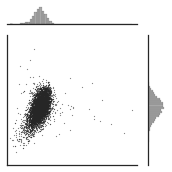

In [19]:
g = sns.jointplot('iPSC_included_background=phenotype_downstream200nt', 
                  'iPSC_included_background=phenotype_upstream200nt', 
                  study.supplemental.kmer_zscores_background_phenotype, size=2.5, 
                  color='#262626', stat_func=None,
                  joint_kws=dict(alpha=0.5, s=1, rasterized=True))
g.ax_joint.set(xlabel='', xticks=[], ylabel='', yticks=[]);
g.fig.tight_layout()
g.savefig('{}/example_correlation_negative.pdf'.format(figure_folder), dpi=600)

In [21]:
# g = sns.jointplot('upstream200nt_iPSC_bimodal_placental', 'upstream200nt_iPSC_excluded_placental', 
#                   study.supplemental.kmer_zscores, size=2.5, color='#262626', stat_func=None,
#                   joint_kws=dict(alpha=0.5, s=1, rasterized=True))
# g.ax_joint.set(xlabel='', xticks=[], ylabel='', yticks=[]);
# g.fig.tight_layout()
# g.savefig('{}/example_correlation_positive.pdf'.format(figure_folder), dpi=600)

In [22]:
sns.set(style='white', context='paper')

In [23]:
kmer_zscores = {'phenotype': study.supplemental.kmer_zscores_background_phenotype,
                'modality': study.supplemental.kmer_zscores_background_modality,
                'constitutive': study.supplemental.kmer_zscores_background_constitutive}

In [24]:
import re

kmer_zscores_copy = {}

for background, zscores in kmer_zscores.items():
    zscores.columns = zscores.columns.map(lambda x: re.sub('_background=[a-z]+', '', x))
#     kmer_zscores_copy[background] = zscores.copy()
kmer_zscores['phenotype'].head()

,MN_bimodal_exonbody,MN_bimodal_upstream200nt,MN_bimodal_downstream200nt,MN_excluded_exonbody,MN_excluded_upstream200nt,MN_excluded_downstream200nt,MN_included_exonbody,MN_included_upstream200nt,MN_included_downstream200nt,MN_uncategorized_exonbody,...,iPSC_excluded_downstream200nt,iPSC_included_exonbody,iPSC_included_upstream200nt,iPSC_included_downstream200nt,iPSC_middle_exonbody,iPSC_middle_upstream200nt,iPSC_middle_downstream200nt,iPSC_uncategorized_exonbody,iPSC_uncategorized_upstream200nt,iPSC_uncategorized_downstream200nt
AAAA,0.056405,0.175361,0.152522,-0.336768,0.002428,0.008287,0.212556,-0.072078,-0.068940,0.885871,...,0.038945,0.167091,-0.051938,-0.043259,-0.354903,1.303387,-0.220022,0.079013,0.405857,0.384235
AAAC,0.050008,0.181014,0.139388,-0.362839,0.002110,-0.001317,0.233482,-0.074146,-0.053470,0.879162,...,0.012722,0.186482,-0.042672,-0.048479,-0.399564,-0.235414,-0.223115,0.042905,0.252028,0.285885
AAAG,0.007504,0.130289,0.111820,-0.381989,0.030548,0.032929,0.263989,-0.073617,-0.069507,0.805528,...,0.025699,0.194283,-0.042919,-0.045002,-0.399528,2.121747,-0.257663,0.175131,0.214095,0.193140
AAAT,0.071756,0.213067,0.141952,-0.364139,-0.014273,0.016375,0.224952,-0.076973,-0.069441,1.174909,...,0.022285,0.213385,-0.063287,-0.040413,-0.447026,1.444946,-0.283506,0.063098,0.806763,0.307280
AACA,0.056258,0.151192,0.153538,-0.381541,-0.010809,0.014833,0.243870,-0.052223,-0.071286,0.992083,...,0.029234,0.199863,-0.032605,-0.033755,-0.435454,-0.253286,-0.215715,0.048602,0.534870,0.261458


In [25]:
dfs = []

for background, zscores in kmer_zscores.items():
    df = zscores.unstack().reset_index()
    df = df.rename(columns={'level_0': 'Intron', 'level_1': 'K-mer', 0:'Z-Score'})
    df['Intron'] = df['Intron'].str.replace('_background=[a-z]+', '')
    df['Background'] = background
    dfs.append(df)
zscores_tidy = pd.concat(dfs, ignore_index=True)
print(zscores_tidy.shape)
zscores_tidy.head()

(628992, 4)


,Intron,K-mer,Z-Score,Background
0,MN_bimodal_exonbody,AAAA,-0.169238,constitutive
1,MN_bimodal_exonbody,AAAC,-0.175832,constitutive
2,MN_bimodal_exonbody,AAAG,-0.220533,constitutive
3,MN_bimodal_exonbody,AAAT,-0.152331,constitutive
4,MN_bimodal_exonbody,AACA,-0.188590,constitutive


In [26]:
zscores_tidy.groupby(['Background'])['Z-Score'].mean()

Background
constitutive    0.005443
modality        0.007799
phenotype       0.034649
Name: Z-Score, dtype: float64

In [27]:
(zscores_tidy['Z-Score'].abs() <= 0.01).sum()

135319

In [28]:
zscores_tidy_filtered = zscores_tidy.loc[zscores_tidy['Z-Score'].abs() > 0.01]
print(zscores_tidy_filtered.shape)
zscores_tidy_filtered.head()

(459731, 4)


,Intron,K-mer,Z-Score,Background
0,MN_bimodal_exonbody,AAAA,-0.169238,constitutive
1,MN_bimodal_exonbody,AAAC,-0.175832,constitutive
2,MN_bimodal_exonbody,AAAG,-0.220533,constitutive
3,MN_bimodal_exonbody,AAAT,-0.152331,constitutive
4,MN_bimodal_exonbody,AACA,-0.188590,constitutive


In [29]:
! mkdir -p $figure_folder

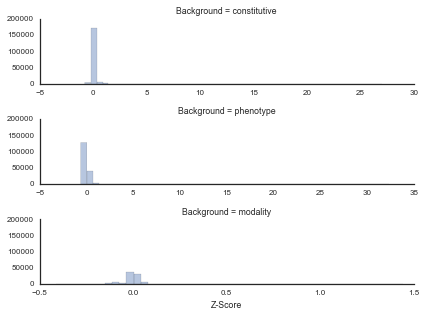

In [30]:
def flatten_distplot(data, **kwargs):
    return sns.distplot(data.values.flat, **kwargs)

g = sns.FacetGrid(data=zscores_tidy_filtered, sharex=False,
                   aspect=4, size=1.5, row='Background',)
g.map(flatten_distplot, 'Z-Score', kde=False)
# g.set(xticks=[])
for ax in g.axes.flat:
    ax.locator_params(nbins=4, axis='y')

# plt.setp(ax.get_xticklabels(), rotation=90);
# sns.despine()
# fig.tight_layout()
g.savefig('{}/kmer_z_score_distplot_factorplot.pdf'.format(figure_folder))

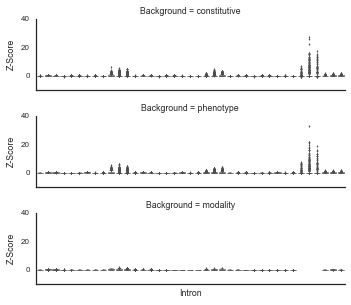

In [31]:
g = sns.factorplot(x='Intron', y='Z-Score', data=zscores_tidy_filtered, 
                   aspect=4, size=1.5, color='grey', row='Background', 
                   kind='box', linewidth=0.5, fliersize=2)
g.set(xticks=[])
for ax in g.axes.flat:
    ax.locator_params(nbins=4, axis='y')

# plt.setp(ax.get_xticklabels(), rotation=90);
# sns.despine()
# fig.tight_layout()
g.savefig('{}/kmer_z_score_boxplots_factorplot.pdf'.format(figure_folder))

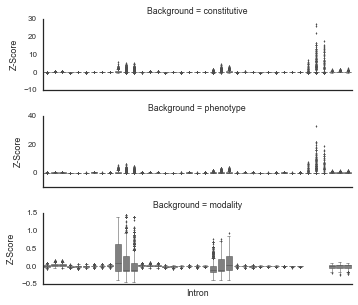

In [32]:
g = sns.factorplot(x='Intron', y='Z-Score', data=zscores_tidy, 
                   aspect=4, size=1.5, color='grey', row='Background', 
                   kind='box', linewidth=0.5, fliersize=2, sharey=False)
g.set(xticks=[])
for ax in g.axes.flat:
    ax.locator_params(nbins=4, axis='y')

# plt.setp(ax.get_xticklabels(), rotation=90);
# sns.despine()
# fig.tight_layout()
g.savefig('{}/kmer_z_score_boxplots_factorplot_sharey-False.pdf'.format(figure_folder))

In [33]:
# for background_name, zscores in kmer_zscores.items():
#     fig, axes = plt.subplots(nrows=2, figsize=(4, 1.5), gridspec_kw=dict(height_ratios=(0.2, 0.8), hspace=0.1))

#     kwargs = dict(linewidth=1, fliersize=2, color='grey')

#     ax = axes[0]
#     sns.boxplot(zscores, ax=ax, **kwargs)
#     # ax.locator_params(nbins=4, axis='y')
#     ax.set(xlabel='', xticks=[], ylabel='', ylim=(1, 12), yticks=[1, 5, 10])
#     sns.despine(ax=ax, bottom=True)

#     ax=axes[1]
#     sns.boxplot(zscores, ax=ax, **kwargs)
#     ax.set(xlabel='', xticks=[], ylabel='', ylim=(-0.5, .5))

#     # plt.setp(ax.get_xticklabels(), rotation=90);
#     sns.despine(ax=ax)
#     ax.locator_params(nbins=3, axis='y')
#     # fig.tight_layout()
#     fig.savefig('{}/kmer_zscores_boxplot_{}_split_axes.pdf'.format(figure_folder, background_name))

## Cluster k-mer matrices

In [36]:
def make_intron_colors(columns):
    phenotype_colors = columns.map(lambda x: study.phenotype_to_color[x.split('_')[0]])
    modality_colors = columns.map(lambda x: MODALITY_TO_COLOR[x.split('_')[1]])
    direction_colors = columns.map(lambda x: direction_to_color[x.split('_')[-1].split('nt')[0].rstrip('0123456789')])
    intron_colors = pd.DataFrame([modality_colors, direction_colors, phenotype_colors], columns=columns)
    return intron_colors

In [37]:
def retain_cols(data, retain=('included', 'bimodal', 'excluded')):
    try:
        data = data[[col for col in data if any([r in col for r in retain])]]
    except TypeError:
        pass
    return data

In [38]:
def kmer_clustermap(kmer_zscores, retain=('included', 'bimodal', 'excluded'), 
                    row_filter=lambda x: x.var(axis=1) > (x.var(axis=1).mean() + 4*x.var(axis=1).std()),
                    **kwargs):
    data = kmer_zscores
    data = retain_cols(data, retain)
    print(data.shape)
    if row_filter is not None:
        data = data.loc[row_filter(data)]
    print(data.shape)

    intron_colors = make_intron_colors(data.columns)

    g = sns.clustermap(data.fillna(0), col_colors=intron_colors.values, method='ward', **kwargs)
    plt.setp(g.ax_heatmap.get_yticklabels(), rotation=0);
    return g

### Plot an unclustered one so can steal the ordered colorbar

(5376, 39)
(38, 39)


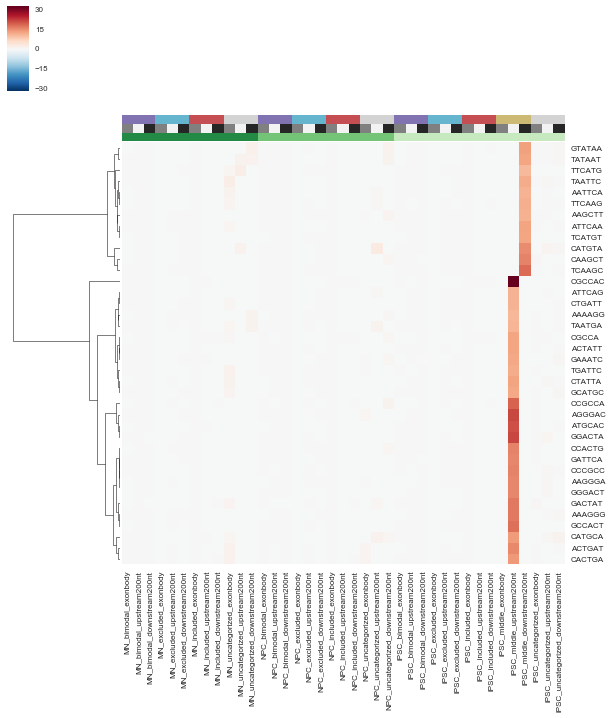

In [39]:
g = kmer_clustermap(study.supplemental.kmer_zscores_background_phenotype, col_cluster=False, 
                    retain=('included', 'bimodal', 'excluded', 'middle', 'uncategorized'))
g.fig.savefig('{}/zscores_not_column_clustered.pdf'.format(figure_folder))

(5376, 27)
(70, 27)
(5376, 27)
(105, 27)
(5376, 27)
(58, 27)


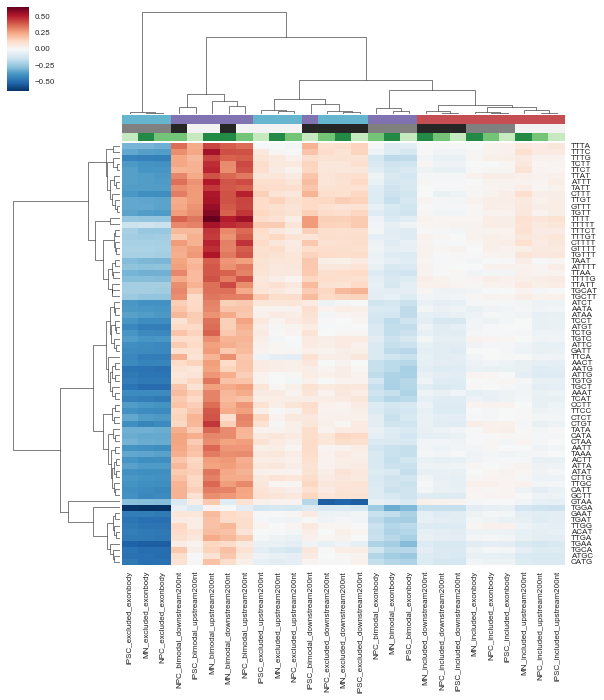

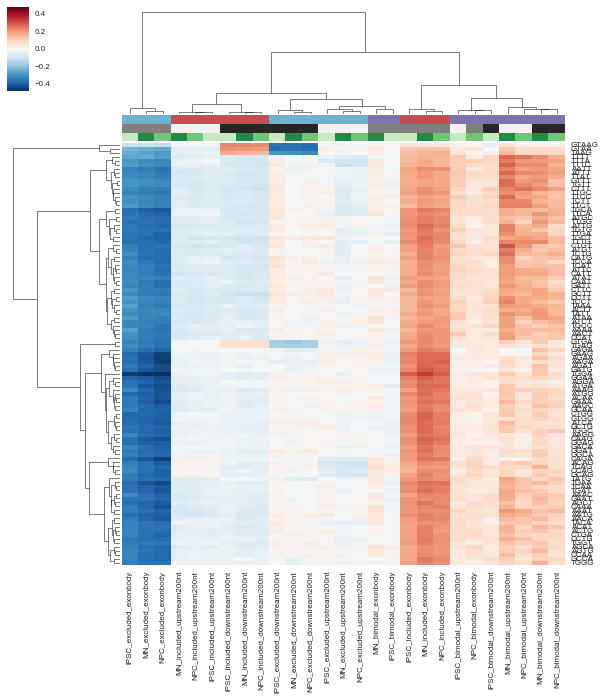

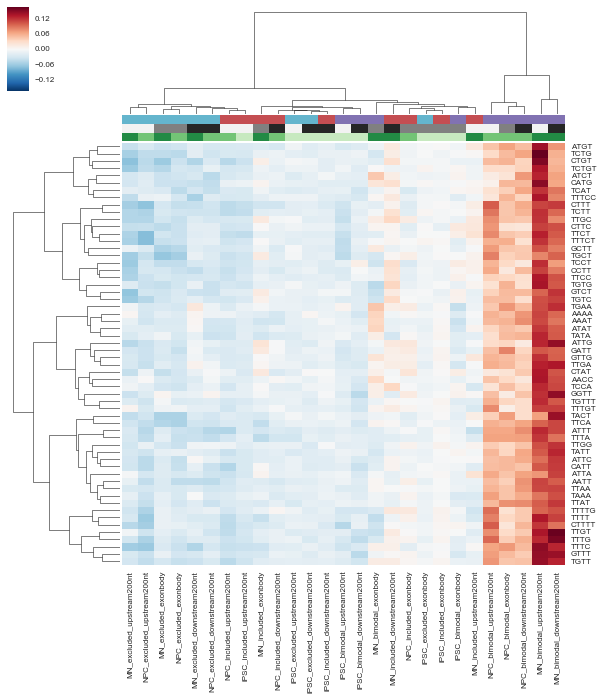

In [40]:
for background_name, zscores in kmer_zscores.items():
    g = kmer_clustermap(zscores)
    g.savefig('{}/kmer_clustermap_background_{}.pdf'.format(figure_folder, background_name))

## Cluster on correlations

In [41]:
cmap = 'RdBu_r' #sns.diverging_palette(220, 0, as_cmap=True)

(39, 27)
(39, 27)
(39, 27)
(39, 27)
(39, 27)
(39, 27)


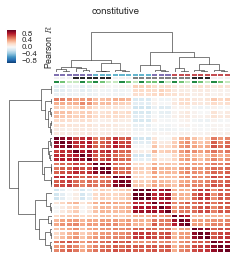

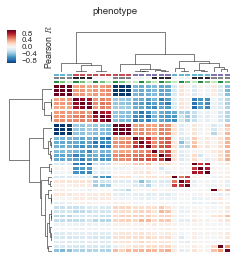

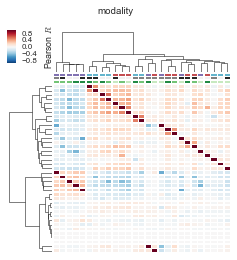

In [42]:
for background_name, zscores in kmer_zscores.items():
    corr = zscores.corr()
    g = kmer_clustermap(corr, cbar_kws=dict(label='Pearson $R$'), vmin=-1, vmax=1,
                   linewidth=0.5, figsize=(4, 4), row_filter=None)
    g.ax_heatmap.set(xticks=[], yticks=[])
    g.fig.suptitle(background_name)
    g.savefig('{}/kmer_correlation_clustermap_background_{}.pdf'.format(figure_folder, background_name))

## PCA on k-mer z-scores

In [44]:
# metadata = pd.DataFrame(list(data.columns.map(lambda x: x.split('_'))), 
#                         index=data.columns, columns=['phenotype', 'modality', 'background', 'location'])
# metadata.head()

In [45]:
# from sklearn.decomposition import PCA

# import plotly.plotly as py
# import plotly.graph_objs as go


# # for background, zscores in kmer_zscores.items():


# def kmer_pcaplot(zscores, title, retain=('included', 'excluded', 'bimodal'), transpose=False):
# #     zscores = kmer_zscores[background]

#     data = zscores.fillna(0)
#     data = retain_cols(data, retain=retain)
    
#     if transpose:
#         data = data.T
#         title += '-transposed'
        
    
#     print(data.shape)

#     pca = PCA(n_components=2)
#     reduced = pd.DataFrame(pca.fit_transform(data), 
#                            index=data.index)
#     reduced.columns = reduced.columns.map(lambda x: 'component_{}'.format(x))
#     # reduced = reduced
#     print('\t', reduced.shape)
#     reduced.index = reduced.index.map(lambda x: x.replace('T', 'U'))

#     #     text = ['{}<br>{}'.format(y, x.split('_')[0]) for x, y  in zip(reduced.index, gene_names)]
#     trace0 = go.Scatter(x=reduced.iloc[:, 0], y=reduced.iloc[:, 1], mode='markers', name='Motifs',
#                         marker=dict(size=10, opacity=0.5, color='black'), text=reduced.index)

    
#     lines = []
# #     print('\t', metadata.shape)
# #     metadata = pd.DataFrame(list(data.columns.map(lambda x: x.split('_'))), 
# #                             index=data.columns, columns=['phenotype', 'modality', 'background', 'location'])
# #     scaling_factor = reduced.apply(np.linalg.norm, axis=1).max()
# #     for phenotype, phenotype_df in components.groupby(metadata, axis=1):
# #     #     linestyle = '-'
# #         if phenotype == 'iPSC':
# #             linestyle = 'solid'
# #         elif phenotype == 'NPC':
# #             linestyle = 'dash'
# #         else:
# #             linestyle = 'dot'
# #         for modality, modality_df in phenotype_df.groupby(study.supplemental.kmer_zscores_metadata['modality'], axis=1):
# #             palette = map(mpl.colors.rgb2hex, reversed(sns.light_palette(MODALITY_TO_COLOR[modality], n_colors=3)))

# #             for color, (component, column) in zip(palette, modality_df.iteritems()):
# #                 x = [0, column[0]*scaling_factor]
# #                 y = [0, column[1]*scaling_factor]
# #                 lines.append(go.Scatter(x=x, y=y, mode='lines', name=component, text=component,
# #                                         line=dict(color=color, width=10, dash=linestyle)))
    
#     plotly_data = [trace0] + lines

#     layout = go.Layout(
#     #     autosize=False, width=500, height=500,
#     title='Modality k-mer z-scores ({})'.format(title),
#     hovermode='closest',
#     xaxis=dict(
#         title='PC 1 explains {:d}% of variance'.format(int(pca.explained_variance_ratio_[0] * 100)),
#         ticklen=5,
#         zeroline=False,
#         gridwidth=0,
#         ),
#     yaxis=dict(
#         title='PC 2 explains {:d}% of variance'.format(int(pca.explained_variance_ratio_[1] * 100)),
#         ticklen=5,
#         zeroline=True,
#         gridwidth=0,
#         ),
#     )

#     fig = go.Figure(data=plotly_data, layout=layout)
#     return py.iplot(fig, filename='kmer-zscore-pca-background-{}'.format(title))

In [46]:
cd ..

/home/obotvinnik/ipython_notebook/singlecell/manuscript


In [47]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [48]:
import common

In [49]:
background = 'constitutive'
common.kmer_pcaplot(kmer_zscores[background], 
                    filename='kmer-zscore-pca-background-{}'.format(background), 
                    title='Modality K-mer Z-Scores  (background: {})'.format(background),)

(5376, 27)
('\t', (5376, 2))
('\t', (27, 3))


In [50]:
background = 'modality'
common.kmer_pcaplot(kmer_zscores[background], 
                    filename='kmer-zscore-pca-background-{}'.format(background), 
                    title='Modality K-mer Z-Scores (background: {})'.format(background),)

(5376, 27)
('\t', (5376, 2))
('\t', (27, 3))


In [51]:
background = 'phenotype'
common.kmer_pcaplot(kmer_zscores[background], 
                    filename='kmer-zscore-pca-background-{}'.format(background), 
                    title='Modality K-mer Z-Scores (background: {})'.format(background),)

(5376, 27)
('\t', (5376, 2))
('\t', (27, 3))


In [ ]:
background = 'constitutive'
kmer_pcaplot(kmer_zscores[background], background, retain=None)

In [ ]:
background = 'constitutive'
kmer_pcaplot(kmer_zscores[background], background, transpose=True)

In [ ]:
background = 'modality'
kmer_pcaplot(kmer_zscores[background], background)

In [ ]:
background = 'modality'
kmer_pcaplot(kmer_zscores[background], background, transpose=True)

In [ ]:
background = 'phenotype'
kmer_pcaplot(kmer_zscores[background], background)

In [ ]:
background = 'phenotype'
kmer_pcaplot(kmer_zscores[background], background, transpose=True)

In [ ]:
import plotly.plotly as py
import plotly.graph_objs as go


text = ['{}<br>{}'.format(y, x.split('_')[0]) for x, y  in zip(reduced.index, gene_names)]
trace0 = go.Scatter(x=reduced.iloc[:, 0], y=reduced.iloc[:, 1], mode='markers', name='Motifs',
                    marker=dict(size=10, opacity=0.5, color='black'), text=text)

lines = []
scaling_factor = reduced.apply(np.linalg.norm, axis=1).max()
for phenotype, phenotype_df in components.groupby(study.supplemental.kmer_zscores_metadata['phenotype'], axis=1):
#     linestyle = '-'
    if phenotype == 'iPSC':
        linestyle = 'solid'
    elif phenotype == 'NPC':
        linestyle = 'dash'
    else:
        linestyle = 'dot'
    for modality, modality_df in phenotype_df.groupby(study.supplemental.kmer_zscores_metadata['modality'], axis=1):
        palette = map(mpl.colors.rgb2hex, reversed(sns.light_palette(MODALITY_TO_COLOR[modality], n_colors=3)))

        for color, (component, column) in zip(palette, modality_df.iteritems()):
            x = [0, column[0]*scaling_factor]
            y = [0, column[1]*scaling_factor]
            lines.append(go.Scatter(x=x, y=y, mode='lines', name=component, text=component,
                                    line=dict(color=color, width=10, dash=linestyle)))
#             print tier, direction, component
#             labels.append(component)
#             ax.plot([0, column[0]], [0, column[1]], label=component, 
#                     linewidth=3, 
#                     color=color, zorder=100, linestyle=linestyle)

plotly_data = [trace0] + lines
layout = go.Layout(
#     autosize=False, width=500, height=500,
    title='Motif enrichment in modality k-mers (t-Test)',
    hovermode='closest',
    xaxis=dict(
        title='PC 1 explains {:d}% of variance'.format(int(pca.explained_variance_ratio_[0] * 100)),
        ticklen=5,
        zeroline=False,
        gridwidth=0,
    ),
    yaxis=dict(
        title='PC 2 explains {:d}% of variance'.format(int(pca.explained_variance_ratio_[1] * 100)),
        ticklen=5,
        zeroline=True,
        gridwidth=0,
    ),
)
fig = go.Figure(data=plotly_data, layout=layout)
py.iplot(fig, filename='motif-ttest-enrichment-modality-kmers-v3')

In [ ]:
for gene_name, (motif, row) in zip(gene_names, reduced.iterrows()):
    ax.text(row[0], row[1], gene_name, horizontalalignment='center', clip_on=True,
            verticalalignment='center', fontsize=8, alpha=0.75)
    
components = pd.DataFrame(pca.components_, columns=data.columns)

scaling_factor = reduced.apply(np.linalg.norm, axis=1).max()

# for color, (component, column) in zip(palette, components.iteritems()):
labels = []
for phenotype, phenotype_df in components.groupby(study.supplemental.kmer_zscores_metadata['phenotype'], axis=1):
#     linestyle = '-'
    if phenotype == 'iPSC':
        linestyle = '-'
    elif phenotype == 'NPC':
        linestyle = 'dashed'
    else:
        linestyle = ':'
    for modality, modality_df in phenotype_df.groupby(study.supplemental.kmer_zscores_metadata['modality'], axis=1):
        palette = reversed(sns.light_palette(MODALITY_TO_COLOR[modality], n_colors=3))

        for color, (component, column) in zip(palette, modality_df.iteritems()):
            labels.append(component)
            ax.plot([0, column[0]*scaling_factor], 
                    [0, column[1]*scaling_factor], label=component, 
                    linewidth=3, 
                    color=color, zorder=100, linestyle=linestyle)
# ax.legend()
xmin, ymin = reduced.min()*1.1
xmax, ymax = reduced.max()*1.1

ax.set(xlim=(xmin, xmax), ylim=(ymin, ymax))
fig.tight_layout()
sns.despine(bottom=True, left=True)
ax.set(xticks=[], yticks=[]);
for i, explained_variance in enumerate(pca.explained_variance_ratio_):
    if i == 0:
        ax.set(xlabel='PC 1 explains {:d}% of variance'.format(int(explained_variance * 100)))
    else:
        ax.set(ylabel='PC 2 explains {:d}% of variance'.format(int(explained_variance * 100)))
fig.savefig('{}/kmer_cisbp_motif_pca.pdf'.format(figure_folder))


In [ ]:
excluded_bimodal_included_cols = [x for x in t_statistic_homo_sapiens.columns if 'bimodal' in x or 'included' in x or 'excluded' in x]
excluded_bimodal_included_cols

In [ ]:
t_statistic_excluded_bimodal_included = t_statistic_splicing[excluded_bimodal_included_cols]

In [ ]:
excluded_bimodal_included_phenotype_colors = [study.phenotype_to_color[x.split('_')[1]] for x in excluded_bimodal_included_cols]
excluded_bimodal_included_modality_colors = [MODALITY_TO_COLOR[x.split('_')[2]] for x in excluded_bimodal_included_cols]
excluded_bimodal_included_direction_colors = [direction_to_color[x.split('_')[0].rstrip('nt').rstrip('0123456789')] for x in 
                                              excluded_bimodal_included_cols]
excluded_bimodal_included_intron_colors = pd.DataFrame([excluded_bimodal_included_modality_colors, 
                                           excluded_bimodal_included_direction_colors, 
                                           excluded_bimodal_included_phenotype_colors], columns=excluded_bimodal_included_cols)
excluded_bimodal_included_intron_colors

In [ ]:
sns.set(style='white')
g = sns.clustermap(t_statistic_excluded_bimodal_included, method='ward',
                   col_colors=excluded_bimodal_included_intron_colors.values, 
                   yticklabels=splicing_rbp_names, figsize=(4, 8))
g.ax_heatmap.set(xticks=[]);
plt.setp(g.ax_heatmap.get_yticklabels(), rotation=0, fontsize=4);
g.savefig('{}/t_statistic_excluded_bimodal_included_splicing_clustermap.pdf'.format(figure_folder))

In [ ]:
data = t_statistic_excluded_bimodal_included

pca = PCA(n_components=2)
reduced = pd.DataFrame(pca.fit_transform(data), 
                       index=data.index)
reduced.columns = reduced.columns.map(lambda x: 'component_{}'.format(x))
# reduced = reduced
print reduced.shape
reduced.index = reduced.index.map(lambda x: x.replace('T', 'U'))
reduced.head()

In [ ]:
gene_names = reduced.index.map(lambda x: x.split('_')[2])
gene_names = [study.expression.feature_data.gene_name[x] if x in study.expression.feature_data.index else x for x in gene_names]
gene_names = [x if x != 'ENSG00000248163' else 'NOVA1' for x in gene_names]

In [ ]:
sns.set(style='ticks')

fig, ax = plt.subplots(figsize=(4, 3))
# for group1, df1 in reduced.groupby(study.supplemental.tier12_kmer_metadata['Tier']):
# ax.plot(reduced.iloc[:, 0], reduced.iloc[:, 1], color='none')
for gene_name, (motif, row) in zip(gene_names, reduced.iterrows()):
    ax.text(row[0], row[1], gene_name, horizontalalignment='center', clip_on=True,
            verticalalignment='center', fontsize=8, alpha=0.75)
    
components = pd.DataFrame(pca.components_, columns=data.columns)

scaling_factor = reduced.apply(np.linalg.norm, axis=1).max()

# for color, (component, column) in zip(palette, components.iteritems()):
labels = []
for phenotype, phenotype_df in components.groupby(study.supplemental.kmer_zscores_metadata['phenotype'], axis=1):
#     linestyle = '-'
    if phenotype == 'iPSC':
        linestyle = '-'
    elif phenotype == 'NPC':
        linestyle = 'dashed'
    else:
        linestyle = ':'
    for modality, modality_df in phenotype_df.groupby(study.supplemental.kmer_zscores_metadata['modality'], axis=1):
        palette = reversed(sns.light_palette(MODALITY_TO_COLOR[modality], n_colors=3))

        for color, (component, column) in zip(palette, modality_df.iteritems()):
            labels.append(component)
            ax.plot([0, column[0]*scaling_factor], 
                    [0, column[1]*scaling_factor], label=component, 
                    linewidth=3, 
                    color=color, zorder=100, linestyle=linestyle)
# ax.legend()
xmin, ymin = reduced.min()*1.1
xmax, ymax = reduced.max()*1.1

ax.set(xlim=(xmin, xmax), ylim=(ymin, ymax))
fig.tight_layout()
sns.despine(bottom=True, left=True)
ax.set(xticks=[], yticks=[]);
for i, explained_variance in enumerate(pca.explained_variance_ratio_):
    if i == 0:
        ax.set(xlabel='PC 1 explains {:d}% of variance'.format(int(explained_variance * 100)))
    else:
        ax.set(ylabel='PC 2 explains {:d}% of variance'.format(int(explained_variance * 100)))
fig.savefig('{}/kmer_cisbp_motif_pca.pdf'.format(figure_folder))

# ax.set(xlabel='', ylabel='')
# quadrants = {'upper_left': dict(xlim=(xmin, 0), ylim=(0, ymax)),
#              'upper_right': dict(xlim=(0, xmax), ylim=(0, ymax)),
#              'lower_left': dict(xlim=(xmin, 0), ylim=(ymin, 0)),
#              'lower_right': dict(xlim=(0, xmax), ylim=(ymin, 0))}
# for quadrant, limits in quadrants.items():
#     ax.set(**limits)
#     fig.savefig('{}/kmer_cisbp_motif_pca_quadrant_{}.pdf'.format(utest_folder, quadrant))

# Make legend separately by hand
legend_fig, legend_ax = plt.subplots(figsize=(3, 4.25))#, fontdict=dict(fontsize=8))
legend_ax.legend(ax.lines, labels, ncol=1, loc='center', fontsize=8);
sns.despine(bottom=True, left=True, fig=legend_fig)
legend_ax.set(xticks=[], yticks=[]);
legend_fig.tight_layout()
legend_fig.savefig('{}/kmer_cisbp_motif_pca_legend.pdf'.format(figure_folder))


In [ ]:
sns.set(style='ticks')

fig, ax = plt.subplots(figsize=(4, 3))
# for group1, df1 in reduced.groupby(study.supplemental.tier12_kmer_metadata['Tier']):
ax.scatter(reduced.iloc[:, 0], reduced.iloc[:, 1], color='k', alpha=0.5)
# for gene_name, (motif, row) in zip(gene_names, reduced.iterrows()):
#     ax.text(row[0], row[1], gene_name, horizontalalignment='center', clip_on=True,
#             verticalalignment='center', fontsize=8, alpha=0.75)
    
components = pd.DataFrame(pca.components_, columns=data.columns)

scaling_factor = reduced.apply(np.linalg.norm, axis=1).max()

# for color, (component, column) in zip(palette, components.iteritems()):
labels = []
for phenotype, phenotype_df in components.groupby(study.supplemental.kmer_zscores_metadata['phenotype'], axis=1):
#     linestyle = '-'
    if phenotype == 'iPSC':
        linestyle = '-'
    elif phenotype == 'NPC':
        linestyle = 'dashed'
    else:
        linestyle = ':'
    for modality, modality_df in phenotype_df.groupby(study.supplemental.kmer_zscores_metadata['modality'], axis=1):
        palette = reversed(sns.light_palette(MODALITY_TO_COLOR[modality], n_colors=3))

        for color, (component, column) in zip(palette, modality_df.iteritems()):
            labels.append(component)
            ax.plot([0, column[0]*scaling_factor], 
                    [0, column[1]*scaling_factor], label=component, 
                    linewidth=3, 
                    color=color, zorder=100, linestyle=linestyle)
# ax.legend()
xmin, ymin = reduced.min()*1.1
xmax, ymax = reduced.max()*1.1

ax.set(xlim=(xmin, xmax), ylim=(ymin, ymax))
fig.tight_layout()
sns.despine(bottom=True, left=True)
ax.set(xticks=[], yticks=[]);
for i, explained_variance in enumerate(pca.explained_variance_ratio_):
    if i == 0:
        ax.set(xlabel='PC 1 explains {:d}% of variance'.format(int(explained_variance * 100)))
    else:
        ax.set(ylabel='PC 2 explains {:d}% of variance'.format(int(explained_variance * 100)))
fig.savefig('{}/kmer_cisbp_motif_pca_points.pdf'.format(figure_folder))

ax.set(xlabel='', ylabel='')
quadrants = {'upper_left': dict(xlim=(xmin, 0), ylim=(0, ymax)),
             'upper_right': dict(xlim=(0, xmax), ylim=(0, ymax)),
             'lower_left': dict(xlim=(xmin, 0), ylim=(ymin, 0)),
             'lower_right': dict(xlim=(0, xmax), ylim=(ymin, 0))}
# for quadrant, limits in quadrants.items():
#     ax.set(**limits)
#     fig.savefig('{}/kmer_cisbp_motif_pca_quadrant_{}_points.pdf'.format(figure_folder, quadrant))

# Make legend separately by hand
legend_fig, legend_ax = plt.subplots(figsize=(3, 4.25))#, fontdict=dict(fontsize=8))
legend_ax.legend(ax.lines, labels, ncol=1, loc='center', fontsize=8);
sns.despine(bottom=True, left=True, fig=legend_fig)
legend_ax.set(xticks=[], yticks=[]);
legend_fig.tight_layout()
legend_fig.savefig('{}/kmer_cisbp_motif_pca_legend.pdf'.format(figure_folder))


In [ ]:
import matplotlib as mpl

In [ ]:
import plotly.plotly as py
import plotly.graph_objs as go


text = ['{}<br>{}'.format(y, x.split('_')[0]) for x, y  in zip(reduced.index, gene_names)]
trace0 = go.Scatter(x=reduced.iloc[:, 0], y=reduced.iloc[:, 1], mode='markers', name='Motifs',
                    marker=dict(size=10, opacity=0.5, color='black'), text=text)

lines = []
scaling_factor = reduced.apply(np.linalg.norm, axis=1).max()
for phenotype, phenotype_df in components.groupby(study.supplemental.kmer_zscores_metadata['phenotype'], axis=1):
#     linestyle = '-'
    if phenotype == 'iPSC':
        linestyle = 'solid'
    elif phenotype == 'NPC':
        linestyle = 'dash'
    else:
        linestyle = 'dot'
    for modality, modality_df in phenotype_df.groupby(study.supplemental.kmer_zscores_metadata['modality'], axis=1):
        palette = map(mpl.colors.rgb2hex, reversed(sns.light_palette(MODALITY_TO_COLOR[modality], n_colors=3)))

        for color, (component, column) in zip(palette, modality_df.iteritems()):
            x = [0, column[0]*scaling_factor]
            y = [0, column[1]*scaling_factor]
            lines.append(go.Scatter(x=x, y=y, mode='lines', name=component, text=component,
                                    line=dict(color=color, width=10, dash=linestyle)))
#             print tier, direction, component
#             labels.append(component)
#             ax.plot([0, column[0]], [0, column[1]], label=component, 
#                     linewidth=3, 
#                     color=color, zorder=100, linestyle=linestyle)

plotly_data = [trace0] + lines
layout = go.Layout(
#     autosize=False, width=500, height=500,
    title='Motif enrichment in modality k-mers (t-Test)',
    hovermode='closest',
    xaxis=dict(
        title='PC 1 explains {:d}% of variance'.format(int(pca.explained_variance_ratio_[0] * 100)),
        ticklen=5,
        zeroline=False,
        gridwidth=0,
    ),
    yaxis=dict(
        title='PC 2 explains {:d}% of variance'.format(int(pca.explained_variance_ratio_[1] * 100)),
        ticklen=5,
        zeroline=True,
        gridwidth=0,
    ),
)
fig = go.Figure(data=plotly_data, layout=layout)
py.iplot(fig, filename='motif-ttest-enrichment-modality-kmers-v3')

In [ ]:
figure_folder

In [ ]:
ax.get_xlim()

In [ ]:
reduced.apply(np.linalg.norm, axis=1).max()

In [ ]:
components

In [ ]:
sns.set?